In [5]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号

In [6]:
def generatedata(rad, thk, sep, n, x1=0, y1=0):
    """
    产生课本109页的数据集，这里设置的参数为半径rad，圆环宽度thk，
    上下圆环间隔sep，n为数据集总数，x1, y1为上半圆环的圆心
    """
    #上半个圆的圆心
    X1 = x1
    Y1 = y1

    #下半个圆的圆心
    X2 = X1 + rad + thk / 2
    Y2 = Y1 - sep
    
    #生成角度theta
    Theta = np.random.uniform(0, 2*np.pi, n)
    #生成距离r
    R = np.random.uniform(rad, rad+thk, n)
    
    #根据Theta生成标签
    y = 2 * (Theta < np.pi) - 1
    
    #生成点集合X，首先根据y的标签生成圆心
    X = np.zeros((n, 2))
    X[y > 0] = np.array([X1, Y1]) 
    X[y < 0] = np.array([X2, Y2])
    #其次用参数方程生成坐标
    X[:, 0] += np.cos(Theta) * R
    X[:, 1] += np.sin(Theta) * R
    
    return X, y

[ 1 -1  1 ...  1  1  1]


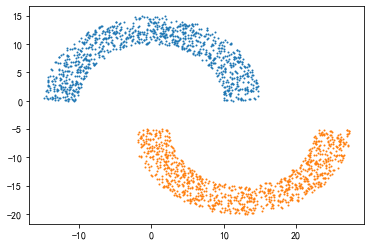

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import inv


#Step1 产生数据
#参数
rad = 10
thk = 5
sep = 5
N = 2000

#产生数据
X, y = generatedata(rad, thk, sep, N)
print(y)
#作图
plt.scatter(X[y>0][:, 0], X[y>0][:, 1], s=1)
plt.scatter(X[y<0][:, 0], X[y<0][:, 1], s=1)
plt.show()


In [8]:
def Judge(X, y, w):
    """
    判别函数，判断所有数据是否分类完成
    """
    n = X.shape[0]
    #判断是否分类完成
    num = np.sum(X.dot(w) * y > 0)
    return num == n


In [9]:
def PLA(X, y, eta=1, max_step=np.inf):
    """
    PLA算法，X，y为输入数据，eta为步长，默认为1，max_step为最多迭代次数，默认为无穷
    """
    #获取维度
    n, d = X.shape
    #初始化
    w = np.zeros(d)
    #记录迭代次数
    t = 0
    #记录元素的下标
    i = 0
    #记录最后一个错误的下标
    last = 0
    while not(Judge(X, y, w)) and t < max_step:
        if np.sign(X[i, :].dot(w) * y[i]) <= 0:
            #迭代次数增加
            t += 1
            w += eta * y[i] * X[i, :]
            #更新最后一个错误
            last = i
        
        #移动到下一个元素
        i += 1
        #如果达到n，则重置为0
        if i == n:
            i = 0
    
    return t, last, w


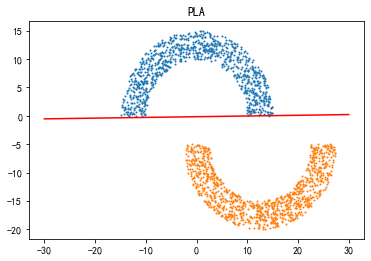

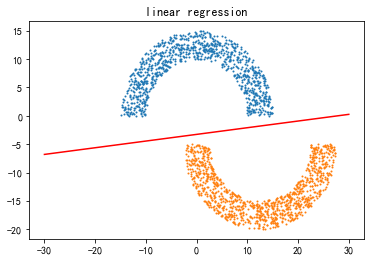

In [10]:


#Step2 训练数据
#(a)PLA
#对数据预处理，加上偏置项项1
X_treat = np.c_[np.ones(N), X]

#PLA
t, last, w = PLA(X_treat, y)

#作出直线
r = 2 * (rad + thk)
a1 = np.array([-r,r])
b1 = - (w[0] + w[1] * a1) / w[2]

plt.scatter(X[y>0][:, 0], X[y>0][:, 1], s=1)
plt.scatter(X[y<0][:, 0], X[y<0][:, 1], s=1)
plt.plot(a1, b1, c="red")
plt.title('PLA')
plt.show()

#(b)linear regression
w1 = inv(X_treat.T.dot(X_treat)).dot(X_treat.T).dot(y)

#作图
a2 = np.array([-r,r])
b2 = - (w1[0] + w1[1] * a1) / w1[2]

plt.scatter(X[y>0][:, 0], X[y>0][:, 1], s=1)
plt.scatter(X[y<0][:, 0], X[y<0][:, 1], s=1)
plt.plot(a2, b2, c="red")
plt.title('linear regression')
plt.show()